In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import json

import nibabel
import nilearn
import numpy as np
import sklearn
import pandas as pd

from nilearn import plotting

import rtcloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Prepare test samples
test_subject = 2
data_dir = "data"

haxby = nilearn.datasets.fetch_haxby(data_dir="datasets", subjects=[test_subject])
labels_test = pd.read_csv(haxby.session_target[0], sep=" ")
y_test_all = labels_test["labels"]
condition_mask_test = y_test_all.isin(["face", "house"])

In [13]:
fmri_img_test = nilearn.image.index_img(haxby.func[0], condition_mask_test)
fmri_data_test = fmri_img_test.get_data()
y_test = y_test_all[condition_mask_test]
for sample in range(fmri_data_test.shape[-1]):
    sample_data = fmri_data_test[..., sample][..., np.newaxis]
    sample_img = nilearn.image.new_img_like(fmri_img_test, sample_data)
    nibabel.save(sample_img, "{}/subject-{}-sample-{:03}.nii.gz".format(data_dir, test_subject, sample))

In [33]:
conf = {
    'test': 1
}
mask_img = nibabel.load(haxby.mask)
conf['experiment_data'] = {
    "models": sklearn.externals.joblib.load("models.pkl"),
    "mask_data": mask_img.get_data().astype(bool),
    "mask_affine": mask_img.affine,
}

client = rtcloud.Client(server_ip='34.237.207.176', conf=conf)
client.start()

In [35]:
client.queue(input_dir=data_dir, tr=2002, loop=True)

ERROR:pika.adapters.base_connection:Connection to 34.237.207.176:5672 failed: timeout
ERROR:pika.adapters.blocking_connection:Connection open failed - 'Connection to 34.237.207.176:5672 failed: timeout'
Process Process-9:
Traceback (most recent call last):
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mihai/Surse/rtcloud/rtcloud/client.py", line 104, in queue_helper
    channel = get_channel(server_ip, queue_work_name)
  File "/home/mihai/Surse/rtcloud/rtcloud/client.py", line 29, in get_channel
    rmq = pika.BlockingConnection(pika.ConnectionParameters(address))
  File "/home/mihai/.local/lib/python3.5/site-packages/pika/adapters/blocking_connection.py", line 374, in __init__
    self._process_io_for_connection_setup()
  File "/home/mihai/.local/lib/python3

Starting to watch!


ERROR:pika.adapters.base_connection:Connection to 34.237.207.176:5672 failed: timeout
ERROR:pika.adapters.blocking_connection:Connection open failed - 'Connection to 34.237.207.176:5672 failed: timeout'
Process Process-7:
Traceback (most recent call last):
ERROR:pika.adapters.base_connection:Connection to 34.237.207.176:5672 failed: timeout
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/home/mihai/.local/lib/python3.5/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mihai/Surse/rtcloud/rtcloud/client.py", line 104, in queue_helper
    channel = get_channel(server_ip, queue_work_name)
  File "/home/mihai/Surse/rtcloud/rtcloud/client.py", line 29, in get_channel
    rmq = pika.BlockingConnection(pika.ConnectionParameters(address))
ERROR:pika.adapters.blocking_connection:Connection open failed - 'Connection to 34.237.207.176:5672 failed: time

KeyboardInterrupt: 

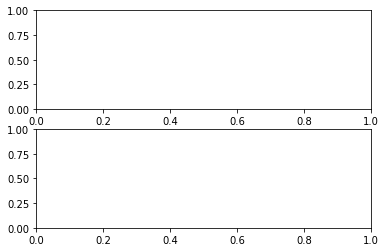

In [34]:
client.watch()
client.display()